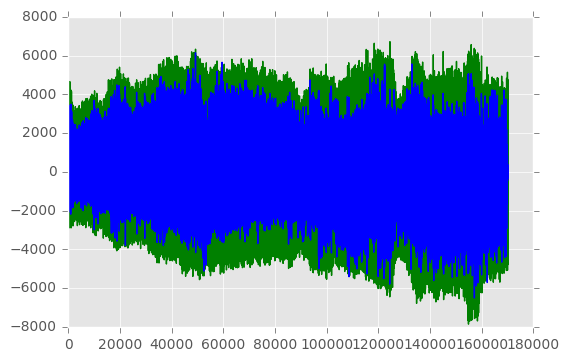

In [19]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
from mpldatacursor import datacursor
import sys
from scipy import signal
from IPython.display import Audio


plt.style.use('ggplot')

# Note: this epoch list only holds for "test_vector_all_voiced.wav"
epoch_marks_orig = np.load("test_vector_all_voiced_epochs.npy")
F_s, audio_data = spwav.read("test_vector_all_voiced.wav")
N = len(audio_data)


######################## YOUR CODE HERE ##############################

#plt.plot(audio_data)
#plt.show()

F_new = 300
new_epoch_spacing = F_s / F_new
audio_out = np.zeros(N)
#print(epoch_marks_orig)


def find_recent(where,right):
    if where in epoch_marks_orig:
        return where,0

    if right is False:
        posi = where
        posi_step = 0
        for posi in range(where,0,-1):
            posi_step += 1
            if posi in epoch_marks_orig:
                break

    elif right is True:
        posi = where
        posi_step = 0
        for posi in range(where, N):
            posi_step += 1
            if posi in epoch_marks_orig:
                break

    return posi,posi_step

# Suggested loop
space = (int)(new_epoch_spacing)

for i in range(5*space,N-5*space+1,space):
    left_most_recent,left_step = find_recent(i,False)
    right_most_recent,right_step = find_recent(i,True)
    closest = 0
    epo_next = 0
    epo_step = 0
    p0 = 0

    if abs(left_step) > abs(right_step):
        closest = right_most_recent
        epo_next ,epo_step= find_recent(closest+1,True)
        p0 = (int)((epo_next-left_most_recent)/2)
    elif abs(left_step) <= abs(right_step):
        closest = left_most_recent
        epo_next,epo_step = find_recent(closest-1,False)
        p0 = (int)((right_most_recent-epo_next)/2)

    start_window = closest - p0
    end_window = closest + p0 + 1
    if start_window < 0:
        start_window = 0

    current_impulse = audio_data[start_window:end_window]
    '''print("current p1", i,
          "closest", closest,
          "epo_next", epo_next,
          "left_most", left_most_recent,
          "right_most", right_most_recent,
          "po", p0,
          "current impulse",len(current_impulse))'''
    current_impulse = signal.hamming(len(current_impulse)) * current_impulse
    start_accept = (int)(i - (len(current_impulse)-1)/2)
    end_accept = (int)(1 + i + (len(current_impulse)-1)/2)
    '''
    if start_accept < 0:
        start_accept = 0
        end_accept = len(current_impulse)
    if end_accept > N - 1:
        end_accept = N
        start_accept = N - len(current_impulse)
    '''

    audio_out[start_accept:end_accept] += current_impulse
spwav.write("audio_out.wav", rate = F_new, data = audio_out)
plt.plot(audio_data,'g')
plt.hold(True)
plt.plot(audio_out,'b')
plt.show()

In [18]:
Audio(audio_out,rate = F_s)

In [9]:
Audio(audio_data,rate = F_s)